In [48]:
# Import necessary libraries
import pandas as pd
import seaborn as sns

In [20]:
def year_combine(start, end):
    """
    Combine individual yearly gun data CSV files into a single DataFrame.

    Parameters:
    - start (int): The starting year (inclusive) for combining data.
    - end (int): The ending year (exclusive) for combining data.

    Returns:
    - combined_df (pandas.DataFrame): A DataFrame containing the combined data from the specified range of years.

    Example:
    >>> combined_data = year_combine(2006, 2021)
    """
    combined_df = pd.DataFrame()
    for x in range(start, end):
        current_df = pd.read_csv(f'../gun_deaths_2006-2020/gun_data_2006-2020/guns_{x}.csv')
        combined_df = pd.concat([combined_df, current_df], ignore_index=True)
    return combined_df

In [21]:
gun_data = year_combine(2006, 2021)

In [22]:
gun_data.drop('hispanic', axis=1, inplace=True)

In [23]:
gun_data.rename(columns={'sex':'victim_sex', 'age':'victim_age', 'race':'victim_race', 'education':'victim_education'}, inplace=True)

In [28]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529233 entries, 0 to 529232
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              529233 non-null  int64  
 1   month             529233 non-null  int64  
 2   intent            529206 non-null  object 
 3   police            529233 non-null  int64  
 4   victim_sex        529233 non-null  object 
 5   victim_age        529156 non-null  float64
 6   victim_race       529233 non-null  object 
 7   place             522573 non-null  object 
 8   victim_education  516025 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 36.3+ MB


In [29]:
gun_data.head(10)

,year,month,intent,police,victim_sex,victim_age,victim_race,place,victim_education
0,2006,1,Suicide,0,M,81.0,White,Home,HS/GED
1,2006,1,Homicide,0,M,55.0,White,Other unspecified,Less than HS
2,2006,1,Homicide,0,M,19.0,Black,Home,Less than HS
3,2006,1,Homicide,0,M,33.0,Black,Other unspecified,Less than HS
4,2006,1,Homicide,0,M,23.0,Black,Home,Less than HS
5,2006,1,Suicide,0,M,88.0,White,Home,Less than HS
6,2006,1,Suicide,0,M,23.0,White,Home,HS/GED
7,2006,1,Homicide,0,M,23.0,Hispanic,Home,HS/GED
8,2006,1,Homicide,0,M,43.0,Black,Home,Less than HS
9,2006,1,Homicide,0,M,23.0,Black,Home,HS/GED


In [31]:
gun_data.tail(10)

,year,month,intent,police,victim_sex,victim_age,victim_race,place,victim_education
529223,2020,12,Suicide,0,F,34.0,White,Home,BA+
529224,2020,12,Homicide,0,F,54.0,Black,Home,HS/GED
529225,2020,12,Homicide,0,M,32.0,Hispanic,Trade/service area,HS/GED
529226,2020,12,Homicide,0,M,26.0,Black,Street,Less than HS
529227,2020,12,Homicide,0,M,35.0,Black,Home,HS/GED
529228,2020,12,Suicide,0,M,35.0,Hispanic,Home,Some college
529229,2020,12,Homicide,0,M,34.0,Black,Street,HS/GED
529230,2020,12,Homicide,0,M,26.0,Black,Street,HS/GED
529231,2020,12,Homicide,0,M,24.0,Black,Trade/service area,HS/GED
529232,2020,12,Homicide,1,M,18.0,Hispanic,NaN,HS/GED


In [32]:
gun_data.sample(10)

,year,month,intent,police,victim_sex,victim_age,victim_race,place,victim_education
448123,2019,4,Suicide,0,M,71.0,White,Home,HS/GED
210730,2012,6,Suicide,0,M,82.0,White,Home,HS/GED
135801,2010,6,Homicide,0,M,34.0,Black,Street,HS/GED
452406,2019,5,Suicide,0,M,78.0,White,Other specified,BA+
280952,2014,4,Suicide,0,M,28.0,Asian/Pacific Islander,Other specified,BA+
394650,2017,8,Homicide,0,M,23.0,Black,Street,Some college
261529,2014,12,Homicide,0,M,35.0,Black,Street,HS/GED
491188,2020,7,Homicide,0,M,27.0,Hispanic,Other specified,HS/GED
323659,2015,8,Homicide,0,M,42.0,Black,Other specified,HS/GED
124282,2009,11,Suicide,0,M,37.0,White,Street,HS/GED


In [33]:
gun_data.describe()

,year,month,police,victim_age
count,529233.000000,529233.000000,529233.000000,529156.000000
mean,2013.480724,6.569454,0.012824,42.918429
std,4.359197,3.400949,0.112516,19.485696
min,2006.000000,1.000000,0.000000,0.000000
25%,2010.000000,4.000000,0.000000,26.000000
50%,2014.000000,7.000000,0.000000,40.000000
75%,2017.000000,9.000000,0.000000,57.000000
max,2020.000000,12.000000,1.000000,109.000000


In [34]:
gun_data.isnull().sum()

year                    0
month                   0
intent                 27
police                  0
victim_sex              0
victim_age             77
victim_race             0
place                6660
victim_education    13208
dtype: int64

In [45]:
gun_data.isnull().mean() * 100

year                0.000000
month               0.000000
intent              0.005102
police              0.000000
victim_sex          0.000000
victim_age          0.014549
victim_race         0.000000
place               1.258425
victim_education    2.495687
dtype: float64

In [127]:
def value_list(column):
    return gun_data[column].value_counts(dropna=False)

In [135]:
for x in gun_data.columns:
    print(f'\n{value_list(x)}\n------------')


year
2020    45222
2017    39773
2018    39740
2019    39707
2016    38658
2015    36252
2013    33636
2014    33599
2012    33563
2011    32351
2010    31672
2008    31593
2009    31347
2007    31224
2006    30896
Name: count, dtype: int64
------------

month
7     48156
8     46397
5     45414
6     45310
10    45011
9     44588
4     43549
12    43545
1     43374
3     43293
11    42999
2     37597
Name: count, dtype: int64
------------

intent
Suicide         315225
Homicide        201468
Accidental        8186
Undetermined      4327
NaN                 27
Name: count, dtype: int64
------------

police
0    522446
1      6787
Name: count, dtype: int64
------------

victim_sex
M    454524
F     74709
Name: count, dtype: int64
------------

victim_age
22.0     13673
21.0     13536
23.0     13479
24.0     13019
25.0     12772
         ...  
109.0        1
104.0        1
107.0        1
105.0        1
106.0        1
Name: count, Length: 110, dtype: int64
------------

victim_race
White

<Axes: >

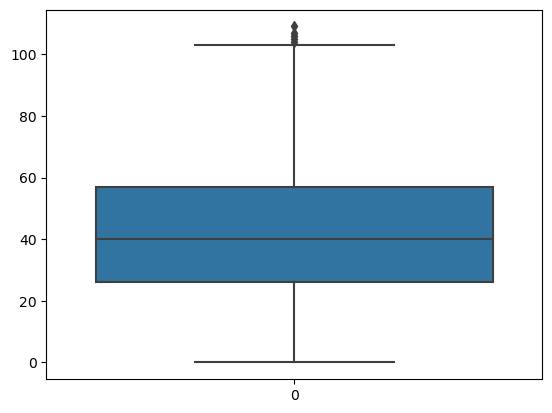

In [55]:
sns.boxplot(data=gun_data['victim_age'])

<Axes: xlabel='year', ylabel='Count'>

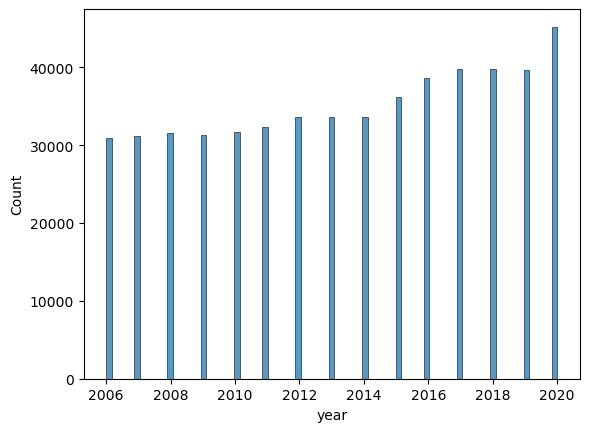

In [53]:
sns.histplot(data=gun_data['year'])

In [24]:
def table_creation(column_list):
    return gun_data[column_list]

In [7]:
gun_data.to_csv('gun_data.csv', index=False)